In [2]:
import numpy as np
import pandas as pd
import geocoder
import geopy
import folium

In [2]:
df=pd.read_csv('data/crime_data.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Primary Type']=le.fit_transform(df['Primary Type'])
df['Primary Type'].head()

0     2
1     2
2    27
3     2
4    31
Name: Primary Type, dtype: int32

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Arrest']=le.fit_transform(df['Arrest'])
df['Arrest'].head()

0    1
1    0
2    0
3    0
4    0
Name: Arrest, dtype: int64

In [5]:
k=df['Block'].value_counts()
dic=k.to_dict()
dic

{'001XX N STATE ST': 3634,
 '0000X W TERMINAL ST': 2746,
 '008XX N MICHIGAN AVE': 2465,
 '076XX S CICERO AVE': 2116,
 '0000X N STATE ST': 1844,
 '064XX S DR MARTIN LUTHER KING JR DR': 1349,
 '083XX S STEWART AVE': 1216,
 '063XX S DR MARTIN LUTHER KING JR DR': 1138,
 '051XX W MADISON ST': 1115,
 '046XX W NORTH AVE': 1113,
 '009XX W BELMONT AVE': 1102,
 '011XX S CANAL ST': 1084,
 '008XX N STATE ST': 1046,
 '040XX W LAKE ST': 1007,
 '100XX W OHARE ST': 965,
 '006XX N MICHIGAN AVE': 953,
 '038XX W ROOSEVELT RD': 925,
 '0000X W HUBBARD ST': 922,
 '033XX W FILLMORE ST': 919,
 '042XX W MADISON ST': 914,
 '012XX S WABASH AVE': 911,
 '0000X S STATE ST': 910,
 '035XX N CLARK ST': 896,
 '007XX N MICHIGAN AVE': 891,
 '071XX S JEFFERY BLVD': 848,
 '011XX W WILSON AVE': 844,
 '066XX S HALSTED ST': 833,
 '001XX W 87TH ST': 793,
 '005XX N MICHIGAN AVE': 787,
 '009XX N MICHIGAN AVE': 782,
 '0000X W 79TH ST': 781,
 '005XX W OHARE ST': 768,
 '035XX S RHODES AVE': 734,
 '005XX N STATE ST': 728,
 '002XX S 

In [6]:
df['Counts'] = df['Block'].map(dic)
df.loc[df['Counts']>0,'Frequency']=0
df.loc[df['Counts']>500,'Frequency']=1
df.loc[df['Counts']>1000,'Frequency']=2
df.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Counts,Frequency
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,2,DOMESTIC BATTERY SIMPLE,APARTMENT,1,...,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",132,0.0
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,2,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,...,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",97,0.0
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,27,RECKLESS CONDUCT,STREET,0,...,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",370,0.0
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,2,SIMPLE,SIDEWALK,0,...,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",115,0.0
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,31,$500 AND UNDER,RESIDENCE,0,...,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",125,0.0


In [7]:
df['Frequency'].value_counts()

0.0    1379698
1.0      54041
2.0      22975
Name: Frequency, dtype: int64

In [8]:
df=df.dropna()
x=df[['Latitude','Longitude','Frequency','Primary Type','Arrest']]

In [9]:
from sklearn.cluster import KMeans
kclus=KMeans(init="k-means++",n_clusters=5).fit(x)
location=kclus.cluster_centers_
location

array([[ 4.18516238e+01, -8.76678197e+01,  1.17222514e-01,
         3.05976692e+01,  1.41444952e-01],
       [ 4.18429719e+01, -8.76708061e+01,  7.45123503e-02,
         6.68083248e+00,  1.80636566e-01],
       [ 4.18417011e+01, -8.76842520e+01,  5.45743193e-02,
         1.65024361e+01,  7.08714672e-01],
       [ 4.18321967e+01, -8.76701262e+01,  3.35749440e-02,
         1.97219550e+00,  1.98655800e-01],
       [ 4.18367473e+01, -8.76777273e+01,  4.32388927e-02,
         2.42141995e+01,  3.23067307e-01]])

In [10]:
coordinates=[]
for i in location:
    li=[]
    li.append(i[0])
    li.append(i[1])
    coordinates.append(li)

coordinates

[[41.85162379121439, -87.66781967858533],
 [41.84297185846474, -87.67080614898383],
 [41.841701120890924, -87.68425195374712],
 [41.832196659757614, -87.67012618660253],
 [41.836747324539324, -87.67772730640722]]

In [11]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 


In [21]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx','gx','yx','cx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


NameError: name 'x1' is not defined

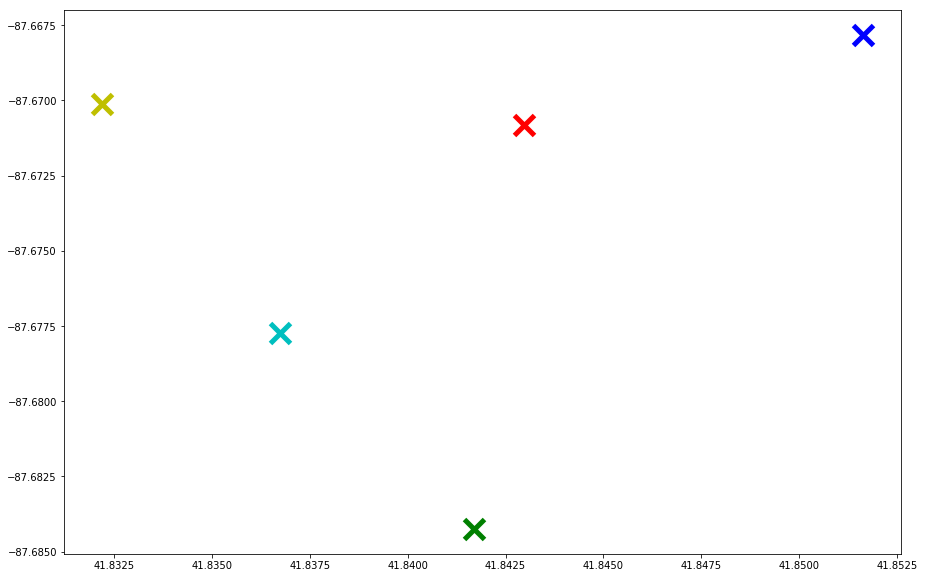

In [22]:
plot_points(coordinates)

In [14]:
import folium
map=folium.Map(location=[41.8781, -87.6298],zoom_start=10,tiles='openstreetmap')

fg=folium.FeatureGroup(name="chicago clusters")
for lat,lon in coordinates:
    fg.add_child(folium.Marker(location=[lat,lon]))

map.add_child(fg)
map

<h1>FOUR square api</h1>

In [15]:
import requests # library to handle requests
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [170]:
CLIENT_ID = 'Q21J5GTT4CJFYTCHPSGEEACN3ENGRRDT3KZUBKB0GXZFSVEE' # your Foursquare ID
CLIENT_SECRET = 'P0OL22Y1CDHVSS5NPXS04ENAXETVOP1WDKT4TFYMBITXT5OT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 150
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q21J5GTT4CJFYTCHPSGEEACN3ENGRRDT3KZUBKB0GXZFSVEE
CLIENT_SECRET:P0OL22Y1CDHVSS5NPXS04ENAXETVOP1WDKT4TFYMBITXT5OT


In [17]:
latitude=coordinates[0][0]
longitude=coordinates[0][1]
radius=1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()
venues=results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4d4b7105d754a06375d81259', 'name': 'P...",False,4e5d07cfc65bbeeeb4281f46,NaN,US,Chicago,United States,NaN,660,"[Chicago, IL 60608, United States]","[{'label': 'display', 'lat': 41.84610154558017...",41.846102,-87.670743,60608,IL,Sims Metal Management-Midwest,v-1557904821,NaN
1,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",False,4c4dcde9ea24c9b6b9ccac14,NaN,US,Chicago,United States,NaN,730,"[Chicago, IL, United States]",NaN,41.856953,-87.662681,NaN,IL,Pilsen,v-1557904821,NaN
2,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",False,4bef05b1d1b7d13ab335cdec,NaN,US,Chicago,United States,NaN,59,"[Chicago, IL 60608, United States]","[{'label': 'display', 'lat': 41.851776, 'lng':...",41.851776,-87.668513,60608,IL,Spa Nordstom,v-1557904821,NaN
3,"[{'id': '4bf58dd8d48988d10b951735', 'name': 'V...",False,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,US,Chicago,United States,NaN,8,"[Cermack and Western Plaza, Chicago, IL USA, U...","[{'label': 'display', 'lat': 41.8517, 'lng': -...",41.851700,-87.667830,USA,IL,GameStop,v-1557904821,NaN
4,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",False,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,US,Chicago,United States,NaN,126,"[2230 S Ashland Ave, Chicago, IL 60608, United...","[{'label': 'display', 'lat': 41.85144498508381...",41.851445,-87.666309,60608,IL,Manjares Restaurant,v-1557904821,NaN


In [18]:
print(dataframe.shape)

(93, 18)


In [19]:
for i in range(1,5):
    latitude=coordinates[i][0]
    longitude=coordinates[i][1]
    radius=1000
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    venues=results['response']['venues']
    dataframe1 = json_normalize(venues)
    dataframe=dataframe.append(dataframe1)
    print(dataframe1.shape)

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(141, 18)
(150, 24)
(132, 25)
(150, 25)


In [20]:
print(dataframe.shape)

(666, 25)


In [28]:
dataframe.columns

Index(['categories', 'delivery.id', 'delivery.provider.icon.name',
       'delivery.provider.icon.prefix', 'delivery.provider.icon.sizes',
       'delivery.provider.name', 'delivery.url', 'hasPerk', 'id',
       'location.address', 'location.cc', 'location.city', 'location.country',
       'location.crossStreet', 'location.distance',
       'location.formattedAddress', 'location.labeledLatLngs', 'location.lat',
       'location.lng', 'location.neighborhood', 'location.postalCode',
       'location.state', 'name', 'referralId', 'venuePage.id'],
      dtype='object')

In [34]:
dataframe.to_csv("crime_more_venues.csv")

In [47]:
z1=dataframe.pivot_table(index=['id'], aggfunc='size').to_dict()

In [41]:
dataframe.pivot_table(index=['id'], aggfunc='size').value_counts()

1    435
2     99
3     11
dtype: int64

In [49]:
dataframe['count']=dataframe['id'].map(z1)

In [50]:
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id,count
0,"[{'id': '4d4b7105d754a06375d81259', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4e5d07cfc65bbeeeb4281f46,NaN,...,"[{'label': 'display', 'lat': 41.84610154558017...",41.846102,-87.670743,NaN,60608,IL,Sims Metal Management-Midwest,v-1557904821,NaN,2
1,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c4dcde9ea24c9b6b9ccac14,NaN,...,NaN,41.856953,-87.662681,NaN,NaN,IL,Pilsen,v-1557904821,NaN,1
2,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,4bef05b1d1b7d13ab335cdec,NaN,...,"[{'label': 'display', 'lat': 41.851776, 'lng':...",41.851776,-87.668513,NaN,60608,IL,Spa Nordstom,v-1557904821,NaN,1
3,"[{'id': '4bf58dd8d48988d10b951735', 'name': 'V...",NaN,NaN,NaN,NaN,NaN,NaN,False,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,...,"[{'label': 'display', 'lat': 41.8517, 'lng': -...",41.851700,-87.667830,NaN,USA,IL,GameStop,v-1557904821,NaN,1
4,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,...,"[{'label': 'display', 'lat': 41.85144498508381...",41.851445,-87.666309,NaN,60608,IL,Manjares Restaurant,v-1557904821,NaN,1


In [71]:
for i in range(dataframe.shape[0]):
    k=dataframe.loc[:,'categories'].values[0]
    category=k[0]['shortName']
    category_id=k[0]['id']
    dataframe['category']=category
    dataframe['category_id']=category_id

In [72]:
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id,count,category,category_id
0,"[{'id': '4d4b7105d754a06375d81259', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4e5d07cfc65bbeeeb4281f46,NaN,...,-87.670743,NaN,60608,IL,Sims Metal Management-Midwest,v-1557904821,NaN,2,Professional,4d4b7105d754a06375d81259
1,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c4dcde9ea24c9b6b9ccac14,NaN,...,-87.662681,NaN,NaN,IL,Pilsen,v-1557904821,NaN,1,Professional,4d4b7105d754a06375d81259
2,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,4bef05b1d1b7d13ab335cdec,NaN,...,-87.668513,NaN,60608,IL,Spa Nordstom,v-1557904821,NaN,1,Professional,4d4b7105d754a06375d81259
3,"[{'id': '4bf58dd8d48988d10b951735', 'name': 'V...",NaN,NaN,NaN,NaN,NaN,NaN,False,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,...,-87.667830,NaN,USA,IL,GameStop,v-1557904821,NaN,1,Professional,4d4b7105d754a06375d81259
4,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,...,-87.666309,NaN,60608,IL,Manjares Restaurant,v-1557904821,NaN,1,Professional,4d4b7105d754a06375d81259


In [73]:
dataframe=dataframe.drop(columns=['categories','referralId','delivery.id','delivery.provider.icon.name','delivery.provider.icon.prefix','delivery.provider.icon.sizes','delivery.provider.name','delivery.url','location.formattedAddress','location.labeledLatLngs','location.distance'])
dataframe.head()                                

,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,...,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id,count,category,category_id
0,False,4e5d07cfc65bbeeeb4281f46,NaN,US,Chicago,United States,NaN,660,"[Chicago, IL 60608, United States]","[{'label': 'display', 'lat': 41.84610154558017...",...,-87.670743,NaN,60608,IL,Sims Metal Management-Midwest,v-1557904821,NaN,2,Professional,4d4b7105d754a06375d81259
1,False,4c4dcde9ea24c9b6b9ccac14,NaN,US,Chicago,United States,NaN,730,"[Chicago, IL, United States]",NaN,...,-87.662681,NaN,NaN,IL,Pilsen,v-1557904821,NaN,1,Professional,4d4b7105d754a06375d81259
2,False,4bef05b1d1b7d13ab335cdec,NaN,US,Chicago,United States,NaN,59,"[Chicago, IL 60608, United States]","[{'label': 'display', 'lat': 41.851776, 'lng':...",...,-87.668513,NaN,60608,IL,Spa Nordstom,v-1557904821,NaN,1,Professional,4d4b7105d754a06375d81259
3,False,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,US,Chicago,United States,NaN,8,"[Cermack and Western Plaza, Chicago, IL USA, U...","[{'label': 'display', 'lat': 41.8517, 'lng': -...",...,-87.667830,NaN,USA,IL,GameStop,v-1557904821,NaN,1,Professional,4d4b7105d754a06375d81259
4,False,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,US,Chicago,United States,NaN,126,"[2230 S Ashland Ave, Chicago, IL 60608, United...","[{'label': 'display', 'lat': 41.85144498508381...",...,-87.666309,NaN,60608,IL,Manjares Restaurant,v-1557904821,NaN,1,Professional,4d4b7105d754a06375d81259


In [96]:
dataframe=dataframe.drop_duplicates()
dataframe.shape

(545, 17)

In [207]:
dataframe.head()

,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.lat,location.lng,location.neighborhood,...,location.state,name,venuePage.id,count,category,category_id,verified,likes,tips_count,types
0,False,4e5d07cfc65bbeeeb4281f46,NaN,US,Chicago,United States,NaN,41.846102,-87.670743,NaN,...,IL,Sims Metal Management-Midwest,NaN,2,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
1,False,4c4dcde9ea24c9b6b9ccac14,NaN,US,Chicago,United States,NaN,41.856953,-87.662681,NaN,...,IL,Pilsen,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
2,False,4bef05b1d1b7d13ab335cdec,NaN,US,Chicago,United States,NaN,41.851776,-87.668513,NaN,...,IL,Spa Nordstom,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
3,False,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,US,Chicago,United States,NaN,41.851700,-87.667830,NaN,...,IL,GameStop,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
4,False,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,US,Chicago,United States,NaN,41.851445,-87.666309,NaN,...,IL,Manjares Restaurant,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN


In [209]:
dataframe.to_csv('crime_more_venues.csv')

In [4]:
dataframe=pd.read_csv('crime_more_venues.csv')
dataframe.head()

,Unnamed: 0,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.lat,location.lng,...,location.state,name,venuePage.id,count,category,category_id,verified,likes,tips_count,types
0,0,False,4e5d07cfc65bbeeeb4281f46,NaN,US,Chicago,United States,NaN,41.846102,-87.670743,...,IL,Sims Metal Management-Midwest,NaN,2,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
1,1,False,4c4dcde9ea24c9b6b9ccac14,NaN,US,Chicago,United States,NaN,41.856953,-87.662681,...,IL,Pilsen,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
2,2,False,4bef05b1d1b7d13ab335cdec,NaN,US,Chicago,United States,NaN,41.851776,-87.668513,...,IL,Spa Nordstom,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
3,3,False,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,US,Chicago,United States,NaN,41.851700,-87.667830,...,IL,GameStop,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
4,4,False,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,US,Chicago,United States,NaN,41.851445,-87.666309,...,IL,Manjares Restaurant,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN


<h1>NOW updating facilities in each venue </h1>

In [51]:
CLIENT_ID = 'Q1SAFD4WKCOGYOV1XLLHUCD45UF3MSLBRRCTGXIIAJYOMQFL' # your Foursquare ID
CLIENT_SECRET = '4K05K5BBBZZ4HXHLYVFK4CQLTXQDLU32IV5LWN0YYKXOIV4H' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 150
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q1SAFD4WKCOGYOV1XLLHUCD45UF3MSLBRRCTGXIIAJYOMQFL
CLIENT_SECRET:4K05K5BBBZZ4HXHLYVFK4CQLTXQDLU32IV5LWN0YYKXOIV4H


In [52]:
import requests

In [53]:
venue_id = '4cc7458f76749eb08ba8c6f7'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4cc7458f76749eb08ba8c6f7?client_id=Q1SAFD4WKCOGYOV1XLLHUCD45UF3MSLBRRCTGXIIAJYOMQFL&client_secret=4K05K5BBBZZ4HXHLYVFK4CQLTXQDLU32IV5LWN0YYKXOIV4H&v=20180604'

In [54]:
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5cdd19821ed21914bd731083'},
 'response': {'venue': {'id': '4cc7458f76749eb08ba8c6f7',
   'name': 'GameStop',
   'contact': {'phone': '7735231148',
    'formattedPhone': '(773) 523-1148',
    'twitter': 'gamestop'},
   'location': {'address': 'Cermack and Western Plaza',
    'lat': 41.8517,
    'lng': -87.66783,
    'labeledLatLngs': [{'label': 'display', 'lat': 41.8517, 'lng': -87.66783}],
    'postalCode': 'USA',
    'cc': 'US',
    'city': 'Chicago',
    'state': 'IL',
    'country': 'United States',
    'formattedAddress': ['Cermack and Western Plaza',
     'Chicago, IL USA',
     'United States']},
   'canonicalUrl': 'https://foursquare.com/v/gamestop/4cc7458f76749eb08ba8c6f7',
   'categories': [{'id': '4bf58dd8d48988d10b951735',
     'name': 'Video Game Store',
     'pluralName': 'Video Game Stores',
     'shortName': 'Video Games',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/videogames_',
      'suffix': '.png'},
    

In [12]:
print(result['response']['venue']['verified'])
print(result['response']['venue']['likes']['count'])
print(result['response']['venue']['tips']['count'])
print(result['response']['venue']['listed']['groups'])

True
0
0
[{'type': 'others', 'name': 'Lists from other people', 'count': 0, 'items': []}]


In [55]:
li_verified=[]
li_tips=[]
li_likes=[]
li_types=[]

In [92]:
k=dataframe.loc[:,'id'].values
k

array(['4e5d07cfc65bbeeeb4281f46', '4c4dcde9ea24c9b6b9ccac14',
       '4bef05b1d1b7d13ab335cdec', '4cc7458f76749eb08ba8c6f7',
       '4c8afd5c6418a143d27de5ce', '4dc1a714d22da0153354b8c5',
       '4b030d8af964a520454c22e3', '5006fa0ce4b0673789391f06',
       '4b6e0a65f964a520a9a52ce3', '560f3ebc498e019c7e76cec1',
       '51f309e7498e37a1b59adc86', '51159db9e4b066680506adb9',
       '521124d711d29ea9c60d3349', '40b28c80f964a52052fb1ee3',
       '50df8e44e4b05f3e8951ea1f', '525a4748498e2ac1abdae1f3',
       '54f95961498ecf53c7f1913c', '5109866fe4b0ffc7900b13ab',
       '51b23ec2498e55f94571e2e2', '4becc21a6b88c9b61b7c8762',
       '5b85da8e6e488e0025553cac', '4ed653526aa31a0c44978346',
       '51e9e7d1498e9caecc2f8a0a', '5703095c498ed7a1481f555e',
       '4d0d8c79d515236aaf230e4b', '52594e7d498e426b5d8ecb83',
       '4c3d0af57d002d7fc154af18', '4b82a85bf964a520dedc30e3',
       '53a5c33d498e070ad510b9be', '4c9a8e2eb8e9224b02ea4e3d',
       '5273223711d225170441fa18', '40b28c80f964a52055f

In [57]:
for i in k:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    result=requests.get(url).json()
    
    try:
        li_verified.append(result['response']['venue']['verified'])
    except:
        li_verified.append("unknown")
        pass
    
    
    try:
        li_likes.append(result['response']['venue']['likes']['count'])
    except:
        li_likes.append(np.nan)
        pass
    
    try:    
        li_tips.append(result['response']['venue']['tips']['count'])
    except:
        li_tips.append(np.nan)
        pass
    
    try:
        li=[]
        types=result['response']['venue']['listed']['groups']
        for i in types:
            li.append(i['type'])
        li_types.append(li)
    except:
        li_types.append(np.nan)
        pass
    
    

False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
True
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
True
False
Fa

In [191]:
dataframe.head()

,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.lat,location.lng,location.neighborhood,...,location.state,name,venuePage.id,count,category,category_id,verified,likes,tips_count,types
0,False,4e5d07cfc65bbeeeb4281f46,NaN,US,Chicago,United States,NaN,41.846102,-87.670743,NaN,...,IL,Sims Metal Management-Midwest,NaN,2,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
1,False,4c4dcde9ea24c9b6b9ccac14,NaN,US,Chicago,United States,NaN,41.856953,-87.662681,NaN,...,IL,Pilsen,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
2,False,4bef05b1d1b7d13ab335cdec,NaN,US,Chicago,United States,NaN,41.851776,-87.668513,NaN,...,IL,Spa Nordstom,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
3,False,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,US,Chicago,United States,NaN,41.851700,-87.667830,NaN,...,IL,GameStop,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN
4,False,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,US,Chicago,United States,NaN,41.851445,-87.666309,NaN,...,IL,Manjares Restaurant,NaN,1,Professional,4d4b7105d754a06375d81259,unknown,0,0,NaN


In [104]:
dataframe.shape[0]

545

In [60]:
dataframe['likes']=li_likes
dataframe['tips_count']=li_tips
dataframe['types']=li_types
dataframe['verified']=li_verified

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the i

In [105]:
dataframe.tail()

,Unnamed: 0,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.lat,location.lng,...,location.state,name,venuePage.id,count,category,category_id,verified,likes,tips_count,types
540,141,False,4ef5f9126da1f7b65fd1dce7,3440 S Archer Ave,US,Chicago,United States,NaN,41.831610,-87.676309,...,IL,BMO Harris Bank,NaN,1,Professional,4d4b7105d754a06375d81259,False,1,0,[others]
541,143,False,504b9147e4b073cb157961eb,NaN,US,NaN,United States,NaN,41.831938,-87.678783,...,Illinois,Hoyne Park,NaN,1,Professional,4d4b7105d754a06375d81259,False,2,0,[others]
542,145,False,4b9eb614f964a52097fb36e3,3435 S Archer Ave,US,Chicago,United States,Damen,41.831222,-87.675932,...,IL,Cermak Produce (Archer),NaN,1,Professional,4d4b7105d754a06375d81259,False,18,2,[others]
543,146,False,4e4491dfb61cac6fc757d017,NaN,US,Chicago,United States,NaN,41.832830,-87.675411,...,IL,downtown chicago soccer fields,NaN,1,Professional,4d4b7105d754a06375d81259,False,1,0,[others]
544,147,False,58cff68c61052854bedbbedb,2180 w 35th st,US,Chicago,United States,archer ave,41.830490,-87.678190,...,IL,Future Home Of Illinois 2nd District State Rep...,NaN,1,Professional,4d4b7105d754a06375d81259,False,0,0,[others]


In [111]:
from scipy import stats
stime=[]
etime=[]
k=dataframe.loc[:,'id'].values
k[0]

'4e5d07cfc65bbeeeb4281f46'

In [110]:
for i in k:
    url = 'https://api.foursquare.com/v2/venues/{}/hours?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    result=requests.get(url).json()
    
    try:
        start=[]
        end=[]
        for i in range(len(result['response']['popular']['timeframes'])):
            start.append(result['response']['popular']['timeframes'][i]['open'][0]['start'])
            end.append(result['response']['popular']['timeframes'][i]['open'][0]['end'])
        start_timep=stats.mode(start).mode
        end_timep=stats.mode(end).mode
        stime.append(start_timep)
        etime.append(end_timep)
    except:
        stime.append("unknown")
        etime.append("unknown")
        pass

In [112]:
dataframe.head()

,Unnamed: 0,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.lat,location.lng,...,location.state,name,venuePage.id,count,category,category_id,verified,likes,tips_count,types
0,0,False,4e5d07cfc65bbeeeb4281f46,NaN,US,Chicago,United States,NaN,41.846102,-87.670743,...,IL,Sims Metal Management-Midwest,NaN,2,Professional,4d4b7105d754a06375d81259,False,0,0,[others]
1,1,False,4c4dcde9ea24c9b6b9ccac14,NaN,US,Chicago,United States,NaN,41.856953,-87.662681,...,IL,Pilsen,NaN,1,Professional,4d4b7105d754a06375d81259,False,108,15,[others]
2,2,False,4bef05b1d1b7d13ab335cdec,NaN,US,Chicago,United States,NaN,41.851776,-87.668513,...,IL,Spa Nordstom,NaN,1,Professional,4d4b7105d754a06375d81259,False,0,0,[others]
3,3,False,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,US,Chicago,United States,NaN,41.851700,-87.667830,...,IL,GameStop,NaN,1,Professional,4d4b7105d754a06375d81259,True,0,0,[others]
4,4,False,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,US,Chicago,United States,NaN,41.851445,-87.666309,...,IL,Manjares Restaurant,NaN,1,Professional,4d4b7105d754a06375d81259,False,19,10,[others]


In [119]:
dataframe['verified']=dataframe['verified'].astype(str)

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['verified']=le.fit_transform(dataframe['verified'])
dataframe['verified'].head()

0    0
1    0
2    0
3    1
4    0
Name: verified, dtype: int32

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['hasPerk']=le.fit_transform(dataframe['hasPerk'])
dataframe['hasPerk'].head()

0    0
1    0
2    0
3    0
4    0
Name: hasPerk, dtype: int64

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['category']=le.fit_transform(dataframe['category'])
dataframe['category'].head()

0    0
1    0
2    0
3    0
4    0
Name: category, dtype: int64

In [128]:
dataframe.head()

,Unnamed: 0,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.lat,location.lng,...,location.state,name,venuePage.id,count,category,category_id,verified,likes,tips_count,types
0,0,0,4e5d07cfc65bbeeeb4281f46,NaN,US,Chicago,United States,NaN,41.846102,-87.670743,...,IL,Sims Metal Management-Midwest,NaN,2,0,4d4b7105d754a06375d81259,0,0,0,[others]
1,1,0,4c4dcde9ea24c9b6b9ccac14,NaN,US,Chicago,United States,NaN,41.856953,-87.662681,...,IL,Pilsen,NaN,1,0,4d4b7105d754a06375d81259,0,108,15,[others]
2,2,0,4bef05b1d1b7d13ab335cdec,NaN,US,Chicago,United States,NaN,41.851776,-87.668513,...,IL,Spa Nordstom,NaN,1,0,4d4b7105d754a06375d81259,0,0,0,[others]
3,3,0,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,US,Chicago,United States,NaN,41.851700,-87.667830,...,IL,GameStop,NaN,1,0,4d4b7105d754a06375d81259,1,0,0,[others]
4,4,0,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,US,Chicago,United States,NaN,41.851445,-87.666309,...,IL,Manjares Restaurant,NaN,1,0,4d4b7105d754a06375d81259,0,19,10,[others]


In [131]:
x=dataframe[['hasPerk', 'category', 'verified', 'likes', 'tips_count']]
y=dataframe[['count']]

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)
lm=LogisticRegression()
lm.fit(x_train,y_train)


C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
yhat=lm.predict(x_test)

In [145]:
lm.score(x_test,y_test)

0.8029197080291971

In [154]:
print(lm.classes_)
y_prob=lm.predict_proba(x)
y_prob

[1 2 3]


array([[7.57339251e-01, 2.07233952e-01, 3.54267969e-02],
       [9.40488484e-01, 5.95114958e-02, 2.01332279e-08],
       [7.57339251e-01, 2.07233952e-01, 3.54267969e-02],
       ...,
       [7.98302245e-01, 1.98022832e-01, 3.67492342e-03],
       [7.55522080e-01, 2.12563304e-01, 3.19146159e-02],
       [7.57339251e-01, 2.07233952e-01, 3.54267969e-02]])

In [159]:
dataframe['y_prob_1']=[y_prob[i][0] for i in range(dataframe.shape[0])]
dataframe['y_prob_2']=[y_prob[i][1] for i in range(dataframe.shape[0])]
dataframe['y_prob_3']=[y_prob[i][2] for i in range(dataframe.shape[0])]

In [160]:
dataframe.head()

,Unnamed: 0,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.lat,location.lng,...,category,category_id,verified,likes,tips_count,types,y_prob,y_prob_1,y_prob_2,y_prob_3
0,0,0,4e5d07cfc65bbeeeb4281f46,NaN,US,Chicago,United States,NaN,41.846102,-87.670743,...,0,4d4b7105d754a06375d81259,0,0,0,[others],"[0.7573392511443912, 0.2072339519699249, 0.035...",0.757339,0.207234,3.542680e-02
1,1,0,4c4dcde9ea24c9b6b9ccac14,NaN,US,Chicago,United States,NaN,41.856953,-87.662681,...,0,4d4b7105d754a06375d81259,0,108,15,[others],"[0.9404884840437335, 0.0595114958230386, 2.013...",0.940488,0.059511,2.013323e-08
2,2,0,4bef05b1d1b7d13ab335cdec,NaN,US,Chicago,United States,NaN,41.851776,-87.668513,...,0,4d4b7105d754a06375d81259,0,0,0,[others],"[0.7573392511443912, 0.2072339519699249, 0.035...",0.757339,0.207234,3.542680e-02
3,3,0,4cc7458f76749eb08ba8c6f7,Cermack and Western Plaza,US,Chicago,United States,NaN,41.851700,-87.667830,...,0,4d4b7105d754a06375d81259,1,0,0,[others],"[0.8673278167805383, 0.11251439931261216, 0.02...",0.867328,0.112514,2.015778e-02
4,4,0,4c8afd5c6418a143d27de5ce,2230 S Ashland Ave,US,Chicago,United States,NaN,41.851445,-87.666309,...,0,4d4b7105d754a06375d81259,0,19,10,[others],"[0.9759410369085075, 0.023131292801040343, 0.0...",0.975941,0.023131,9.276703e-04


In [162]:
dataframe.to_csv("final result")